<a href="https://colab.research.google.com/github/SijiJ/pytorch/blob/main/node-to-edge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import networkx as nx


In [24]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)

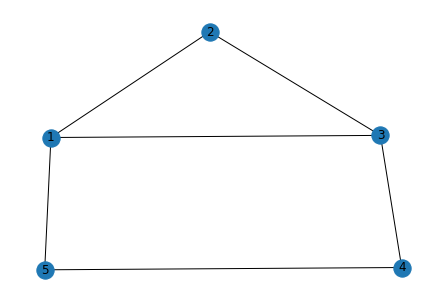

In [25]:
nx.draw(G, with_labels = True)

In [26]:
count=1
for u,v in G.edges():
  print(u,v)
  G.edges[u, v]["label"]=count
  #G.edges[u, v]["label2"]=count
  count+=1


1 2
1 3
1 5
2 3
3 4
5 4


In [27]:
for u,v,a in G.edges(data=True):
  print(u,v,a)
  #print(a['label'])

1 2 {'label': 1}
1 3 {'label': 2}
1 5 {'label': 3}
2 3 {'label': 4}
3 4 {'label': 5}
5 4 {'label': 6}


In [28]:
count=1
for n in G.nodes():
  print(n)
  G.nodes[n]['label']=count
  count+=1

1
2
3
5
4


In [29]:
for n,a in G.nodes(data=True):
  print(n,a)

1 {'label': 1}
2 {'label': 2}
3 {'label': 3}
5 {'label': 4}
4 {'label': 5}


In [30]:
#H = nx.Graph()
for u,v,a in G.edges(data=True):
  H.add_node(a['label'])
for u,v in G.edges():
  #H.add_node(a['label'])
  for e in u,v:
    print(e)
    for u,v,a in G.edges(data=True):
      if e in u,v:


1
2
1
3
1
5
2
3
3
4
5
4
